In [197]:
import zipfile
import requests
import os
import pandas as pd
import numpy as np

In [198]:
zip_url = 'https://github.com/alinadimm/DS01_Project/raw/master/archive.zip'

zip_filename = "local_filename.zip"

# Define the folder to extract the contents
extract_folder = "extracted_data"

# Download the zip file
response = requests.get(zip_url)

if response.status_code == 200:
    with open(zip_filename, "wb") as zip_file:
        zip_file.write(response.content)
    print("Zip file downloaded successfully.")
else:
    print(f"Failed to download the zip file. Status code: {response.status_code}")

# Create the extraction folder if it doesn't exist
if not os.path.exists(extract_folder):
    os.makedirs(extract_folder)

# Extract the contents of the zip file
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

train_csv_filename = "Train.csv"
test_csv_filename = "Test.csv"

# Check if the specified files exist in the extraction folder
if train_csv_filename in os.listdir(extract_folder) and test_csv_filename in os.listdir(extract_folder):
    # Load Train.csv and Test.csv using pandas
    df = pd.read_csv(os.path.join(extract_folder, train_csv_filename))
    test_dataset = pd.read_csv(os.path.join(extract_folder, test_csv_filename))

    # Now you have 'train_dataset' and 'test_dataset' as DataFrames for further processing
else:
    print("CSV files not found in the extraction folder.")


Zip file downloaded successfully.


In [199]:
np.shape(df)

(8523, 12)

In [200]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [201]:
df.describe(include = 'all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [202]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

###Fill Numerical Data with Mean


In [203]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace = True)

###Fill categorical data with mode





In [204]:
mode_of_Outlet_size = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
missing_values =df['Outlet_Size'].isnull()
df.loc[missing_values, 'Outlet_Size'] = df.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [205]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

##Correct Data for Item_Fat_Content



In [206]:
df.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [207]:
df.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

##Handle Outliers

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


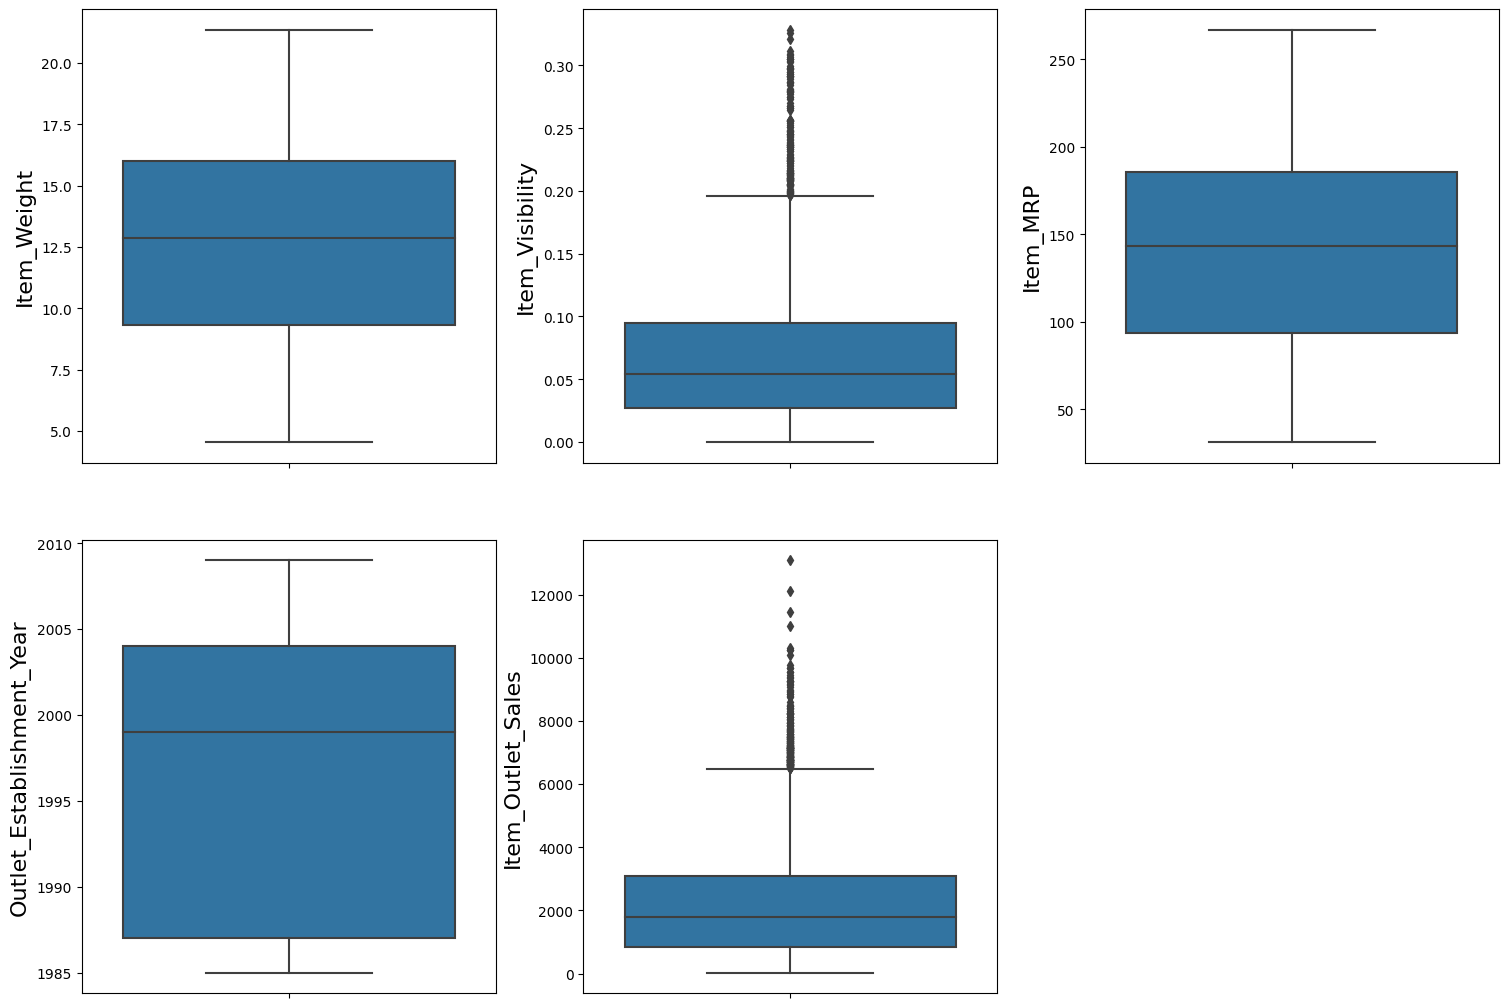

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15, 10))
index = 0
axs = axs.flatten()

for column_name in df.columns:
  if df[column_name].dtype != "object":
    sns.boxplot(y=df[column_name],data=df, ax=axs[index])
    axs[index].set_ylabel(column_name, fontsize=16)
    index += 1

fig.delaxes(axs[-1])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [210]:
outlier_column_names = []

for column_name in df.columns:
    if df[column_name].dtype != "object":
        q1 = df[column_name].quantile(0.25)
        q3 = df[column_name].quantile(0.75)
        iqr = q3 - q1

        O_col = df[column_name][(df[column_name] <= q1 - 1.5 * iqr) | (df[column_name] >= q3 + 1.5 * iqr)]

        perc = np.shape(O_col)[0] * 100.0 / np.shape(df)[0]

        print("Column %s outliers = %.2f%%" % (column_name, perc))

        # Check if the percentage of outliers is greater than 0
        if perc > 0:
            outlier_column_names.append(column_name)

print("Columns with outliers:", outlier_column_names)


Column Item_Weight outliers = 0.00%
Column Item_Visibility outliers = 1.69%
Column Item_MRP outliers = 0.00%
Column Outlet_Establishment_Year outliers = 0.00%
Column Item_Outlet_Sales outliers = 2.18%
Columns with outliers: ['Item_Visibility', 'Item_Outlet_Sales']


In [211]:
for column_name in outlier_column_names:
    if column_name in df.columns:
        q1 = df[column_name].quantile(0.25)
        q3 = df[column_name].quantile(0.75)
        iqr = q3 - q1

        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Winsorization: Replace values below the lower bound with the lower bound
        # and values above the upper bound with the upper bound
        df[column_name] = np.where(df[column_name] < lower_bound, lower_bound, df[column_name])
        df[column_name] = np.where(df[column_name] > upper_bound, upper_bound, df[column_name])


##Visualize Item Type

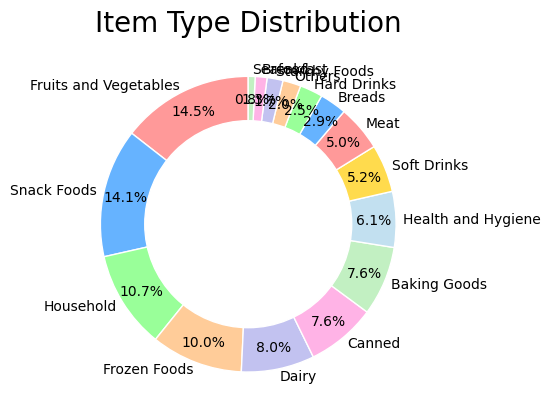

In [212]:
import matplotlib.pyplot as plt

# Data
Item_Type = df['Item_Type'].value_counts()
labels = Item_Type.index
sizes = Item_Type.values

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90,
                                  wedgeprops={'edgecolor': 'white'}, labeldistance=1.05, pctdistance=0.85)

# Draw a white circle in the center for a doughnut effect
circle = plt.Circle((0, 0), 0.7, color='white')
ax.add_artist(circle)

# Title and aspect ratio
plt.title('Item Type Distribution', fontsize = 20)


plt.show()



#Encode Categorical Data

In [213]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [214]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = encoder.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int64  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 799.2 KB


#Train Model

In [215]:
from sklearn.preprocessing import StandardScaler

X = df.drop('Item_Outlet_Sales', axis = 1)
y = df['Item_Outlet_Sales']

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

In [216]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.15, random_state = 42)
print(X_train.shape, X_test.shape)

(7244, 11) (1279, 11)


In [217]:
from sklearn.linear_model import SGDRegressor, LinearRegression

sgdr = SGDRegressor()
linreg = LinearRegression()
sgdr.fit(X_train, y_train)
linreg.fit(X_train, y_train)

print(sgdr)
print(linreg)

SGDRegressor()
LinearRegression()


In [218]:
y_pred_sgd = sgdr.predict(X_test)
y_pred_linreg = linreg.predict(X_test)

##Evaluation

In [226]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2_sgd = r2_score(y_test, y_pred_sgd)
r2_linreg = r2_score(y_test, y_pred_linreg)
mae_sgd = mean_absolute_error(y_test, y_pred_sgd)
mae_linreg = mean_absolute_error(y_test, y_pred_linreg)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
mse_linreg = mean_squared_error(y_test, y_pred_linreg)

print("R Square Error for SGD : ", r2_sgd)
print("R Square Error for NE : ", r2_linreg)
print("\n Mean Absolute Error for SGD : ", mae_sgd)
print(" Mean Absolute Error for NE : ", mae_linreg)
print("  \n Mean Squared Error for SGD : ", mse_sgd)
print(" Mean Squared Error for NE : ", mse_linreg)


R Square Error for SGD :  0.5457193588479166
R Square Error for NE :  0.5460175897878998

 Mean Absolute Error for SGD :  818.3145895030168
 Mean Absolute Error for NE :  818.7090933169098
  
 Mean Squared Error for SGD :  1155946.789593925
 Mean Squared Error for NE :  1155187.921470562
